In [36]:
%matplotlib inline
from sklearn import datasets
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Load dataset

In [25]:
iris = datasets.load_iris()

In [26]:
#convert to pandas dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
print("total size =", len(iris.data))

total size = 150


### Split train/test datasets

In [28]:
indices = np.random.permutation(len(iris.data))
indices_train = indices[:-50]
indices_test  = indices[-50:]
print(len(indices_train), len(indices_test))

100 50


In [29]:
data_train = df.loc[indices_train,:].values
data_test  = df.loc[indices_test,:].values

## Implementation

In [49]:
import math
# Euclidean Distance
def distance(x, y):
    distance = 0
    for i in range(0,len(x)):
        distance += pow((x[i] - y[i]), 2)
    return math.sqrt(distance)

In [51]:
# testing
d = distance(data_train[1], data_train[2])
print(data_train[1], data_train[2], d)

[ 6.   2.9  4.5  1.5] [ 6.5  3.2  5.1  2. ] 0.9746794344808962


In [76]:
from operator import itemgetter

def knn(data_train, data_test, k, targets):
# ...

## Using Scikit 

In [79]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(data_train, iris.target[indices_train]) 
pred = knn.predict(data_test)
pred

array([2, 1, 0, 1, 0, 1, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 1, 1, 0, 0, 0, 2, 1,
       0, 2, 0, 1, 2, 1, 1, 2, 1, 0, 0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 2,
       1, 0, 2, 2])

In [31]:
iris.target[indices_test]

array([2, 1, 0, 1, 0, 1, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 1, 1, 0, 0, 0, 2, 1,
       0, 2, 0, 1, 2, 1, 1, 2, 1, 0, 0, 1, 1, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2,
       2, 0, 2, 2])

In [32]:
pred==iris.target[indices_test]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True], dtype=bool)

In [33]:
acc = sum(pred==iris.target[indices_test])
acc / len(pred)

0.95999999999999996

### Vary k

In [40]:
k_vals = [1,3,5,15, 25, 30]
acc_vals = []
for k in k_vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data_train, iris.target[indices_train]) 
    pred = knn.predict(data_test)
    
    acc_vals.append(sum(pred==iris.target[indices_test]) / len(pred))
    
acc_vals  

[0.93999999999999995,
 0.95999999999999996,
 0.95999999999999996,
 0.93999999999999995,
 0.92000000000000004,
 0.88]

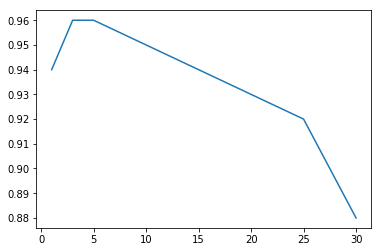

In [41]:
plt.plot(k_vals, acc_vals)